# Exercise 6.3

For this practical you will need the Shock response data for sand. This can be found in the file [sand_swdb.txt](https://github.com/ggorman/Introduction-to-stats-for-geoscientists/blob/gh-pages/data/sand_swdb.txt), taken from the shock wave database.

## Exercise 6.3.1
* Open up the text file and have a look around, see what you're working with.
* Read in the file sand_swdb.txt into two arrays called pressure and energy.
    * Do NOT use recfromcsv to do this! numpy has other methods too, like genfromtxt, which recfromcsv is based on.
* Remember you do not want any 'commented' lines in the text file to be included, how would you do this?

## Exercise 6.3.2

* Make a scatter plot of pressure against energy.
* Label the axes appropriately (include units).
* Perform a linear regression on the data, and overlay the best fit line on the plot (as a dashed line).
* Add a legend to the plot and label the best fit line with its r-value. e.g. r = 0.5.
* Add (or change) the title of your plot to be y = {}x + {} and fill with the fit parameters.

## BONUS ROUND (Harder)

* Remake your plot, but this time with vertical errorbars of 10% on every point.

For this practical you should make extensive use of the matplotlib documentation.

#
#Silica (Sand), R0= 2.140 g/cc
#
#  P      E-E0   
11.560    1.066   
19.698    2.060   
 7.457    0.572   
 5.920    0.673   
 5.786    0.684   
 8.700    1.296   
 9.321    1.445   
15.045    2.486   
15.144    2.531   

#References:
# M. van Thiel (Ed.), Compendium of shock wave data, (Livermore: Lawrence
#   Livermore Laboratory Report UCRL-50108, 1977), 356-357
#
#Denotions:
#R0   - normal density of substance, g/cc
#P    - pressure behind shock front, GPa
#E-E0 - specific energy behind shock front, kJ/g


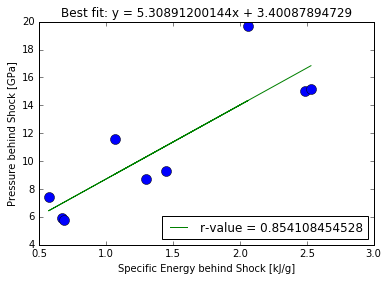

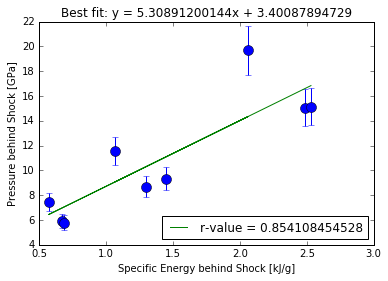

In [2]:
%matplotlib inline
%cat sand_swdb.txt


import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

data = np.genfromtxt('sand_swdb.txt', comments='#')
# Genfromtxt will use a delimiter of a space or tab by default, and specifying
# comments as '#' means it will ignore any line in the text file that starts with
# '#' like in a python script. This reads the data in as a 2D numpy array.

"""BONUS POINTS"""
# If you read the data in using the 'usecols' argument that is particularly good! e.g.
P    = np.genfromtxt('sand_swdb.txt', comments='#', usecols=0)
E    = np.genfromtxt('sand_swdb.txt', comments='#', usecols=1)
# However, either way works fine
"""############"""


Pressure = data[:, 0]
Energy   = data[:, 1]
# Split the data into two arrays

M, C, R, P, err = stats.linregress(Energy,Pressure)
# Linear regression on energy and pressure, to give coefficients of M and C
# from y = Mx + C; R-value, p-value and the standard error.

plt.figure()
# Start the figure
plt.plot(Energy, Pressure, linestyle=' ', marker='o', markersize=10)
# Plot Pressure against Energy. No line, circle markers, size 10
plt.plot(Energy, Energy*M+C, linestyle='-', label = 'r-value = {}'.format(R))
# Plot the best-fit line, use the Energy values on the x-axis and calculate
# the corresponding y-values using y = mx + c. 
# Label this with the r-value, and use conditional formatting to insert it.
plt.xlabel('Specific Energy behind Shock [kJ/g]')
plt.ylabel('Pressure behind Shock [GPa]')
# Label the axes, based on data in the text file
plt.title('Best fit: y = {}x + {}'.format(M,C))
# Use conditional formatting to label the title with the equation fo the best-fit line
plt.legend(loc='best')
# Add a legend, this will contain all the labels from each 'plot' function.
# EXTRA: add a 'loc' argument to give a location for the legend. 'best' puts it in the
# best possible place, to display as much data as possible.

plt.figure()
plt.errorbar(Energy, Pressure, yerr=Pressure*.1, linestyle=' ', marker='o', markersize=10)
# To add errorbars, use the errorbar function, and now just add the argument 'yerr'. To make
# the errorbars 10% simply multiply the Pressure values by 0.1 and assign this to yerr.
# The errorbars will be +/- 10%.
plt.plot(Energy, Energy*M+C, linestyle='-', label = 'r-value = {}'.format(R))
plt.xlabel('Specific Energy behind Shock [kJ/g]')
plt.ylabel('Pressure behind Shock [GPa]')
plt.title('Best fit: y = {}x + {}'.format(M,C))
plt.legend(loc='best')
plt.show()
